Data

In [20]:
import pandas as pd

df = pd.read_csv('german.data2.csv')
df.head(10)

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Savings Account,Employment,Installment Rate,Personal Status,Other Debtors,...,Property,Age,Other Installment Plans,Housing,Existing Credits,Job,Maintenance,Telephone,Foreign Worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1


Pra-Process Data

In [2]:
df.shape

(1000, 21)

Missing Value

In [21]:
missing_values = pd.DataFrame(df.isnull().sum()/df.shape[0], columns=['Missing Values (%)'])
missing_values.sort_values('Missing Values (%)', ascending=False)
print(missing_values)


                         Missing Values (%)
Checking Account                        0.0
Duration                                0.0
Credit History                          0.0
Purpose                                 0.0
Credit Amount                           0.0
Savings Account                         0.0
Employment                              0.0
Installment Rate                        0.0
Personal Status                         0.0
Other Debtors                           0.0
Residence                               0.0
Property                                0.0
Age                                     0.0
Other Installment Plans                 0.0
Housing                                 0.0
Existing Credits                        0.0
Job                                     0.0
Maintenance                             0.0
Telephone                               0.0
Foreign Worker                          0.0
Credit Risk                             0.0


In [307]:
for col in df.columns:
    if df[col].isnull().mean()>0:
        print(col, round(df[col].isnull().mean(),4))
        col_median = df[col].median()
        df[col] = df[col].fillna(col_median)

Tranformasi Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Checking Account         1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit Amount            1000 non-null   int64 
 5   Savings Account          1000 non-null   object
 6   Employment               1000 non-null   object
 7   Installment Rate         1000 non-null   int64 
 8   Personal Status          1000 non-null   object
 9   Other Debtors            1000 non-null   object
 10  Residence                1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other Installment Plans  1000 non-null   object
 14  Housing                  1000 non-null   

In [22]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [5]:
df.head(100)

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Savings Account,Employment,Installment Rate,Personal Status,Other Debtors,...,Property,Age,Other Installment Plans,Housing,Existing Credits,Job,Maintenance,Telephone,Foreign Worker,Credit Risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,54,0,9,15945,0,1,3,2,0,...,3,58,2,0,1,2,1,1,0,1
96,3,12,4,7,2012,4,3,4,1,0,...,2,61,2,1,1,2,1,0,0,0
97,1,18,2,9,2622,1,2,4,2,0,...,2,34,2,1,1,2,1,0,0,0
98,1,36,4,4,2337,0,4,4,2,0,...,0,36,2,1,1,2,1,0,0,0


Heatmap

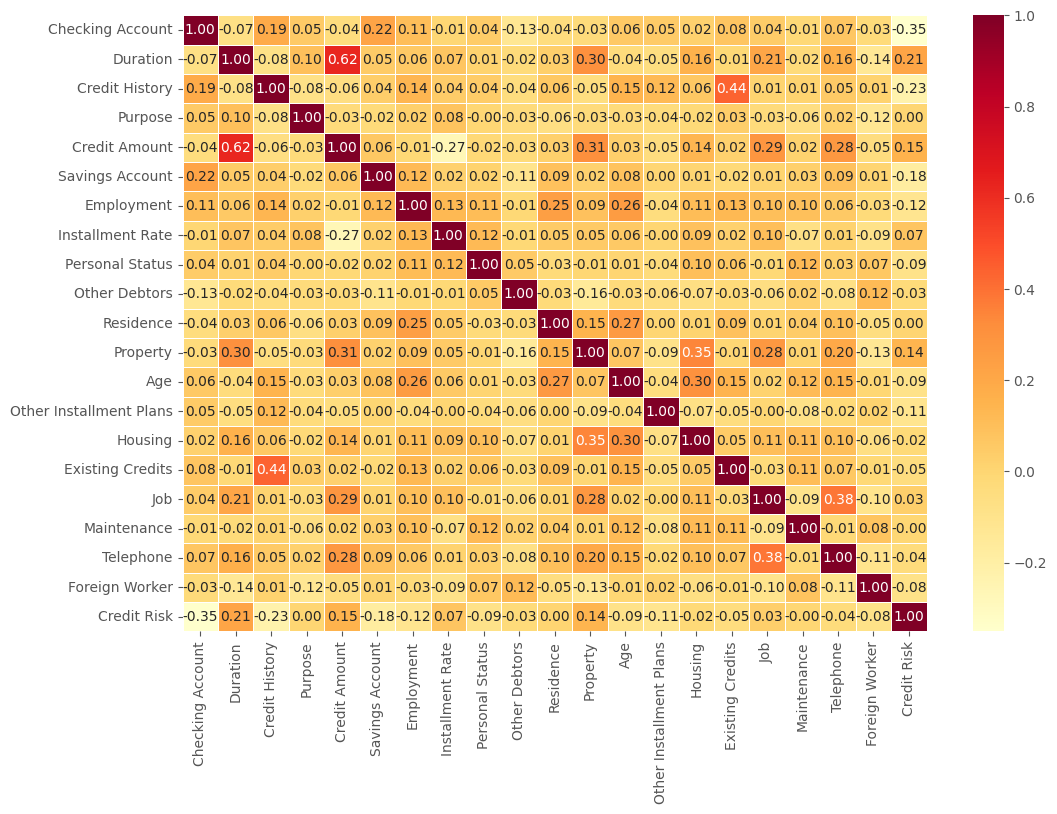

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlOrRd", annot=True, linewidths=0.5, fmt='.2f', ax=ax)
plt.show()

Data Splitting

In [24]:
X = df.drop(['Credit Risk'], axis=1)
y = df['Credit Risk']

# SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#oversampling
sm = SMOTE(sampling_strategy='minority', k_neighbors=5 ,random_state=42)
print('Original dataset shape %s' % Counter(y))
X_resample, y_resample = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_resample))



Original dataset shape Counter({0: 700, 1: 300})
Resampled dataset shape Counter({0: 700, 1: 700})


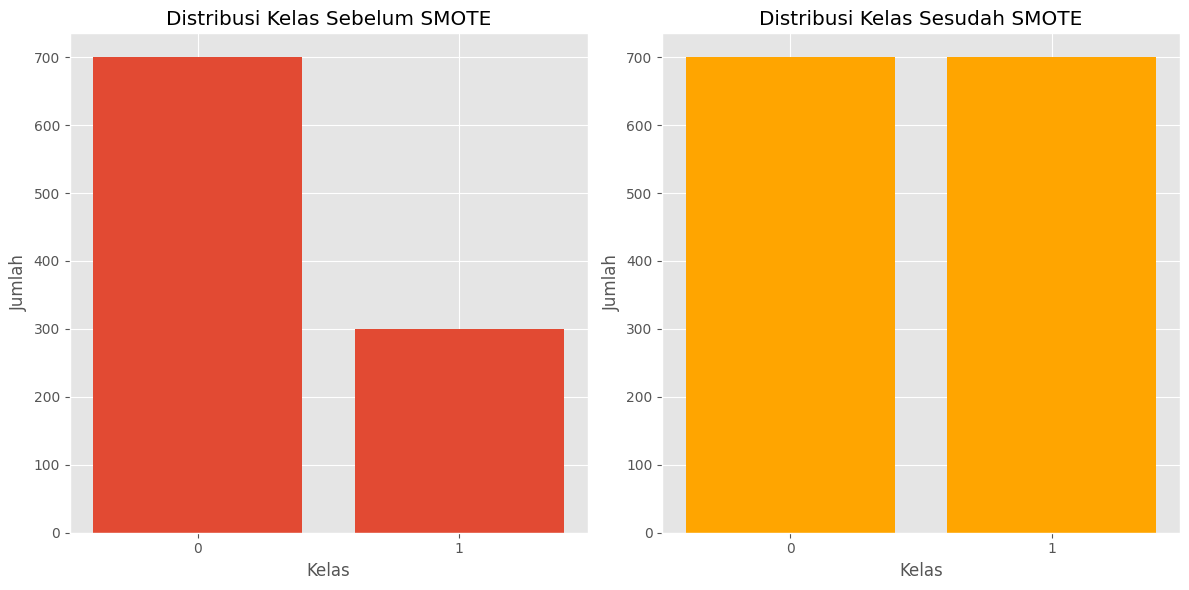

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi kelas sebelum dan sesudah SMOTE
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Sebelum SMOTE
axs[0].bar(['0', '1'], pd.Series(y).value_counts().values)
axs[0].set_title("Distribusi Kelas Sebelum SMOTE")
axs[0].set_xlabel("Kelas")
axs[0].set_ylabel("Jumlah")

# Sesudah SMOTE
axs[1].bar(['0', '1'], pd.Series(y_resample).value_counts().values, color='orange')
axs[1].set_title("Distribusi Kelas Sesudah SMOTE")
axs[1].set_xlabel("Kelas")
axs[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

# Data Splitting

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample ,test_size=0.2, random_state=42)

Pipeline


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

#k = int(input("Masukkan nilai k untuk KNN: "))
k = 3
#metric = input("Masukkan metrik yang akan digunakan untuk KNN (minkowski, manhattan, euclidean, dll.): ")
metric = 'euclidean'

# Membuat pipeline dengan nilai k dan metrik dari input pengguna
knn_pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=k, metric=metric))

In [86]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3))])

In [87]:
from sklearn.model_selection import StratifiedKFold

sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


Confusion Matrix :
[[112  37]
 [ 19 112]]

Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       149
           1       0.75      0.85      0.80       131

    accuracy                           0.80       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.81      0.80      0.80       280

Akurasi score: 0.80
Precision: 0.75
Recall: 0.85
F1-score: 0.80
G-mean: 0.80
cross-validate: 0.79



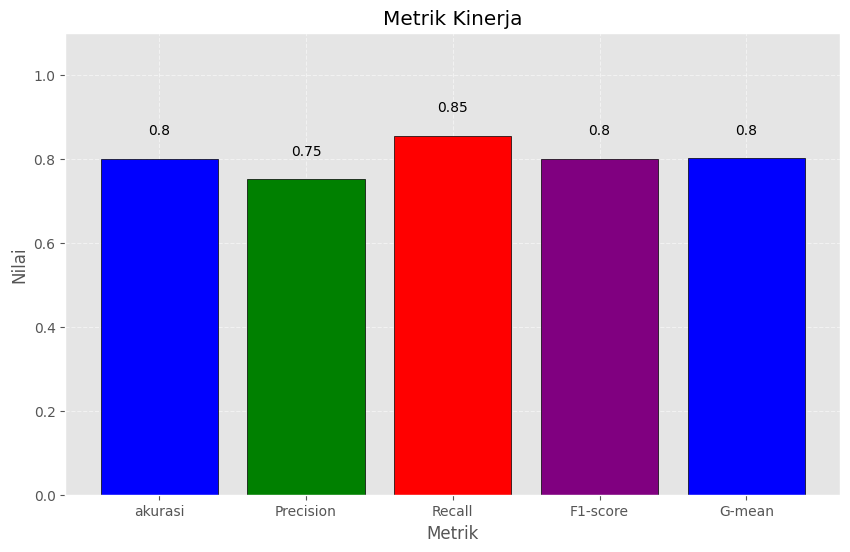

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

y_pred = knn_pipeline.predict(X_test)
print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred))

g_mean = geometric_mean_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi score: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("G-mean: {:.2f}".format(g_mean))
#crossvalidation
cv_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=10)
print("cross-validate: {:.2f}".format(cv_scores.mean()))
print()
# Nilai metrik yang akan diplot
metrics = {
    'akurasi' : accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'G-mean': g_mean
}

# Membuat plot dengan tampilan yang lebih menarik
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'], edgecolor='black')

# Menambahkan teks pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.title('Metrik Kinerja')
plt.ylim(0, 1.1)  # Mengatur batas y-axis dari 0 hingga 1.1 untuk ruang teks
plt.grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid untuk memudahkan pembacaan

# Mengatur gaya plot agar mirip dengan contoh
plt.style.use('ggplot')

plt.show()


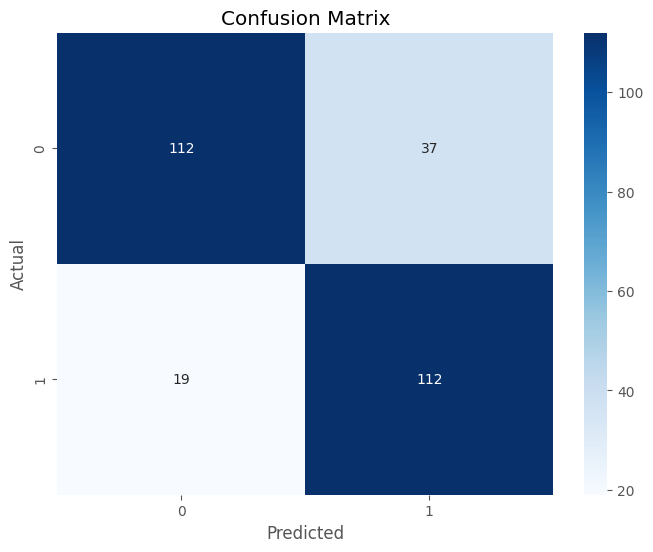

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [91]:
import numpy as np
import pandas as pd

# Mendefinisikan nama kolom berdasarkan fitur yang digunakan dalam model
column_names = ['Checking Account', 'Duration', 'Credit History', 'Purpose', 'Credit Amount',
                'Savings Account', 'Employment', 'Installment Rate', 'Personal Status',
                'Other Debtors', 'Residence', 'Property', 'Age', 'Other Installment Plans',
                'Housing', 'Existing Credits', 'Job', 'Maintenance', 'Telephone', 'Foreign Worker']

# Contoh data baru dengan nama kolom
new_data = pd.DataFrame([[0, 26, 1, 1, 56, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1]],
                        columns=column_names)

# Melakukan prediksi menggunakan pipeline yang telah dilatih
new_prediction = knn_pipeline.predict(new_data)  # Ganti 'manhattan' dengan metrik yang diinginkan
print("Hasil prediksi untuk data baru:", new_prediction)

Hasil prediksi untuk data baru: [0]


In [92]:
import pickle

filename = 'predict_euclidean.pkl'
pickle.dump(knn_pipeline, open(filename, 'wb'))
